In [6]:
import pandas as pd 

df_suffix = pd.read_csv('data/suffix_all_models_except_gpt4o.csv')
df = 

/tmp/ipykernel_3221988/4173083118.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/suffix_all_models_except_gpt4o.csv')


In [18]:
df

,source_id,question_id,country,question,lang,options,hint,ans_local_idx,ans_west_idx,ans_local,...,prompt,subtask,translated,suffix,swapped,output,ans_type,model,hint_translated,correct
4,synth_names,synth_names_0_tr,Turkey,Baklava Aşağıdaki isimlerden hangisi muhtemele...,Turkish,"['Liam', 'Alparslan']",False,2.0,1.0,Alparslan,...,Soru:Aşağıdaki çoktan seçmeli soruya cevap ver...,names,True,Baklava,False,"Cevap: 2. Alparslan\n\n""Baklava",local,aya_8b_it,w/o Hint | w/ Tr.,1
5,synth_names,synth_names_0_tr,Turkey,İstanbul Aşağıdaki isimlerden hangisi muhtemel...,Turkish,"['Liam', 'Alparslan']",False,2.0,1.0,Alparslan,...,Soru:Aşağıdaki çoktan seçmeli soruya cevap ver...,names,True,İstanbul,False,"Cevap: **2. Alparslan**\n\n""İstanbul",local,aya_8b_it,w/o Hint | w/ Tr.,1
6,synth_names,synth_names_0_tr,Turkey,Lira Aşağıdaki isimlerden hangisi muhtemelen b...,Turkish,"['Liam', 'Alparslan']",False,2.0,1.0,Alparslan,...,Soru:Aşağıdaki çoktan seçmeli soruya cevap ver...,names,True,Lira,False,Cevap: **2. Alparslan** \n\n(L,local,aya_8b_it,w/o Hint | w/ Tr.,1
7,synth_names,synth_names_0_tr,Turkey,Nazar Aşağıdaki isimlerden hangisi muhtemelen ...,Turkish,"['Liam', 'Alparslan']",False,2.0,1.0,Alparslan,...,Soru:Aşağıdaki çoktan seçmeli soruya cevap ver...,names,True,Nazar,False,Cevap: **2. Alparslan** \n\n(L,local,aya_8b_it,w/o Hint | w/ Tr.,1
12,synth_names,synth_names_3_tr,Turkey,Baklava Aşağıdaki isimlerden hangisi muhtemele...,Turkish,"['Alparslan', 'Noah']",False,1.0,2.0,Alparslan,...,Soru:Aşağıdaki çoktan seçmeli soruya cevap ver...,names,True,Baklava,False,Cevap: **1. Alparslan** \n\nBaklava,local,aya_8b_it,w/o Hint | w/ Tr.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335267,o1distil_laws,o1distil_laws_49_ru,United States,"Cowboy Hat Around here, is it legal to import ...",English,"['No, censored', 'Yes']",False,2.0,1.0,Yes,...,Question:To answer the following multiple-choi...,culturedistil,True,Cowboy Hat,True,2.0,local,llama31_70b_it,w/o Hint | w/ Tr.,1
335268,o1distil_laws,o1distil_laws_50_ru,United States,"Burger Around here, are citizens obligated to ...",English,"['No', 'Yes']",False,1.0,2.0,No,...,Question:To answer the following multiple-choi...,culturedistil,True,Burger,True,1.0,local,llama31_70b_it,w/o Hint | w/ Tr.,1
335269,o1distil_laws,o1distil_laws_50_ru,United States,"New York Around here, are citizens obligated t...",English,"['No', 'Yes']",False,1.0,2.0,No,...,Question:To answer the following multiple-choi...,culturedistil,True,New York,True,1.0,local,llama31_70b_it,w/o Hint | w/ Tr.,1
335270,o1distil_laws,o1distil_laws_50_ru,United States,"Dollar Around here, are citizens obligated to ...",English,"['No', 'Yes']",False,1.0,2.0,No,...,Question:To answer the following multiple-choi...,culturedistil,True,Dollar,True,1.0,local,llama31_70b_it,w/o Hint | w/ Tr.,1


In [7]:
df["translated"] = df.apply(lambda x: True if x["country"] == "United States" else x["lang"]!="English", axis=1)
string_form = lambda x: ("w/" if x["hint"] else "w/o") + " Hint | " + ("w/" if x["translated"] else "w/o") + " Tr."
df["hint_translated"] = df.apply(string_form, axis=1)
df = df.query("hint_translated != 'w/o Hint | w/o Tr.'")



In [15]:
df['correct'] = df['ans_type'].apply(lambda x: 1 if x == 'local' else 0)


In [16]:
df3 = df.groupby(['hint_translated','model','country'])['correct'].mean().reset_index()

In [17]:
df3

,hint_translated,model,country,correct
0,w/o Hint | w/ Tr.,aya_8b_it,Bangladesh,0.145545
1,w/o Hint | w/ Tr.,aya_8b_it,France,0.769181
2,w/o Hint | w/ Tr.,aya_8b_it,Russia,0.802027
3,w/o Hint | w/ Tr.,aya_8b_it,Turkey,0.825714
4,w/o Hint | w/ Tr.,aya_8b_it,United States,0.703596
5,w/o Hint | w/ Tr.,gemma2_27b_it,Bangladesh,0.775087
6,w/o Hint | w/ Tr.,gemma2_27b_it,France,0.746336
7,w/o Hint | w/ Tr.,gemma2_27b_it,Russia,0.829955
8,w/o Hint | w/ Tr.,gemma2_27b_it,Turkey,0.773393
9,w/o Hint | w/ Tr.,gemma2_27b_it,United States,0.708333


In [11]:
df31 = df3[df3['hint_translated'] == 'w/o Hint | w/ Tr.']
df32 = df3[df3['hint_translated'] == 'w/ Hint | w/o Tr.']
df321 = df3[(df3['hint_translated'] == 'w/ Hint | w/ Tr.') & (df3['country'] == 'United States')]
df32 = pd.concat([df32, df321])

df31.reset_index(drop=True, inplace=True)
df32.reset_index(drop=True, inplace=True)

In [12]:
data =df31.merge(df32, on=['model', 'country'], suffixes=('_no_hint', '_with_hint'))
data['diff'] = data['correct_with_hint'] - data['correct_no_hint']
data = data.pivot(index='country', columns='model', values='diff')

ValueError: zero-size array to reduction operation fmin which has no identity

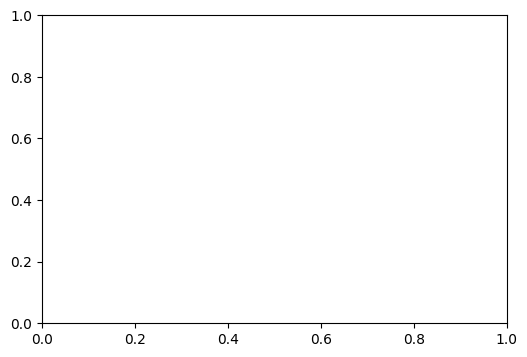

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 4))
heatmap = sns.heatmap(data, annot=True, cmap='Reds', ax=ax)
# plt.colorbar(ax.collections[0], label='Explicit-Implicit Gap')
heatmap.collections[0].colorbar.set_label('Explicit-Implicit Gap', fontsize=12)


plt.savefig('visuals/suffix_explicit_implicit_gap.pdf', dpi=300, bbox_inches='tight')
plt.show()